In [1]:
import tensorflow as tf
data = tf.keras.datasets.cifar10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255

170498071/170498071 [==============================] - 339s 2us/step


[6]


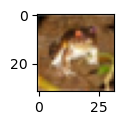

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (1,1))
plt.imshow(x_train[0])
print(y_train[0])

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
         loss='sparse_categorical_crossentropy',
         metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 141s 82ms/step - loss: 1.6287 - accuracy: 0.4013
Epoch 2/30
1563/1563 [==============================] - 88s 56ms/step - loss: 1.3449 - accuracy: 0.5186
Epoch 3/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2209 - accuracy: 0.5678
Epoch 4/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1320 - accuracy: 0.6020
Epoch 5/30
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0587 - accuracy: 0.6292
Epoch 6/30
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0067 - accuracy: 0.6480
Epoch 7/30
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9580 - accuracy: 0.6638
Epoch 8/30
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9225 - accuracy: 0.6750
Epoch 9/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8898 - accuracy: 0.6869
Epoch 10/30
1563/1563 [==============================] - 84s 54

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 21s 54ms/step - loss: 0.9433 - accuracy: 0.6919
0.9432571530342102 0.6919000148773193


In [5]:
predictions = model.predict([x_test])
import numpy as np
print(np.argmax(predictions[0]))

313/313 [==============================] - 5s 14ms/step
3


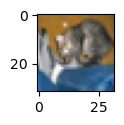

'cat'

In [6]:
plt.figure(figsize = (1,1))
plt.imshow(x_test[0])
plt.show()
classes[np.argmax(predictions[0])]